# 데이터 수집

In [2]:
import pandas as pd
import numpy as np
import re
import csv
from ast import literal_eval

In [9]:
# 파일을 불러온다
bin_list = []
f = open('stock_keywords.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
  bin_list.append(line)
f.close()    

# 컬럼은 따로 저장
column = bin_list[0]

# 컬럼을 제외한 내용을 dataframe으로 저장
df = pd.DataFrame(bin_list[1:], columns=column)

#  1 부터 -1를 한 이유는 작은 따옴표 제거를 위해서!
print(df['ISSUE_CTNT'][0][1:-1])

{'words': ['임상', '미', '약품', '스펙트럼', '코호트', '신약', '포지오', '티', '환자', '평가'], 'wordweights': [0.0284265149384737, 0.025462841615080833, 0.022695163264870644, 0.013655146583914757, 0.01303578820079565, 0.012993966229259968, 0.012948604300618172, 0.012850912287831306, 0.011799762956798077, 0.010517583228647709]}, {'words': ['약품', '미', '제약', '에페', '글', '타이드', '레나', '사노', '피', '경제'], 'wordweights': [0.03076697513461113, 0.03028179332613945, 0.014289376325905323, 0.012275672517716885, 0.01187584362924099, 0.010685126297175884, 0.010680348612368107, 0.010522671975195408, 0.010131321847438812, 0.008497517555952072]}, {'words': ['약품', '미', '탄', '신약', '잘탄', '패밀리', '매출', '아모', '개발', '경제'], 'wordweights': [0.02723238803446293, 0.025522315874695778, 0.019063368439674377, 0.015328889712691307, 0.009565322659909725, 0.009226630441844463, 0.008884117007255554, 0.008547482080757618, 0.008535518310964108, 0.00794411450624466]}, {'words': ['임상', '기술', '바이오', '제약', '치료제', '밝혔', '받', '환자', '평가', '병원'], 'wordw

## 전처리


In [10]:
# 'ISSUE_CTNT'  에서 문자들만 추출하는 함수
def preprocess(str_list):
  p = re.compile("'.+?'")
  matched = p.findall(str_list)

  w_list = []
  for w in matched:
    kor = w.replace("'",'')
    if kor != 'words' and kor != 'wordweights':
      w_list.append(kor)
  # print(w_list)
  return w_list

In [11]:
# data['ISSUE_CTNT']를 전부 전처리 해보자.

kor_data = []

for w in df['ISSUE_CTNT']:
  kor_list = preprocess(w[1:-1])
  kor_data.append(kor_list)

df['ISSUE_CTNT'] = kor_data

df

,STRD_DATE,STCK_ITMT_CD_NM,ITMT_CD_NM,ISSUE_CTNT,ISSUE_CTGO_USE_DOC_NUM,ZP,LOAD_DTM,CENTER_CD
0,20200102,128940,한미약품,"[임상, 미, 약품, 스펙트럼, 코호트, 신약, 포지오, 티, 환자, 평가, 약품,...",48,18536,ZZZZZZ,BBP14
1,20200102,017550,수산중공업,"[정세균, 중공업, 수산, 관련, 알루코, 한경, 총리, 경제, 주가, 급등, 수산...",13,18628,ZZZZZZ,BBP14
2,20200102,071320,지역난방공사,"[수송관, 시험, 성능, 한난, 센터, 경제, 한국지역난방공사, 안전, 사업, 사장]",5,13585,ZZZZZZ,BBP14
3,20200102,066430,와이오엠,"[소송, 회사, 주장, 엠, 박모, 제기, 법, 대응, 채권자, 씨, 엠, 포토, ...",6,46729,ZZZZZZ,BBP14
4,20200102,035600,KG이니시스,"[글로벌, 해외, 세미나, 아마존, 진출, KG, 시스, 가맹점, 시장, 있, 렌탈...",7,04517,ZZZZZZ,BBP14
...,...,...,...,...,...,...,...,...
84012,20200102,009420,한올바이오파마,"[바이오, 한올, 파마, HL, 임상, 신약, 내년, 데이터, 대표, 기대]",5,34344,ZZZZZZ,BBP14
84013,20200102,000660,SK하이닉스,"[SK, 하이닉스, 개발, 사장, 경제, 총괄, 사업, 장, 조직, 인사, 하이닉스...",71,17336,ZZZZZZ,BBP14
84014,20200102,000210,대림산업,"[협력, 대림산업, 회사, 행사, 대표, 경제, 파트, 너스, 숲, 사업, 대림산업...",27,03152,ZZZZZZ,BBP14
84015,20200102,043650,국순당,"[막걸리, 국순당, 미국, 수출, 있, 대회, 술, 차례, 데일리, 현지]",5,25266,ZZZZZZ,BBP14


In [12]:
len(df['ITMT_CD_NM'].unique()), len(df['ITMT_CD_NM'])

(1602, 84017)

In [18]:
from pandas import Series
data = df[['ITMT_CD_NM', 'ISSUE_CTNT']]
cnt = 0

uni_data = {"name":list(data['ITMT_CD_NM'].unique()),
       "words":["" for x in range(len(list(data['ITMT_CD_NM'].unique())))]}
uni_df = pd.DataFrame(uni_data, columns=["name","words"])

data.sort_values(by='ITMT_CD_NM', inplace=True)
uni_df.sort_values(by='name', inplace=True)


data['ISSUE_CTNT'] = data['ISSUE_CTNT'].apply(lambda x : ' '.join(x))

cnt = 0
for i in range(84017):
  print(i)
  if data.iloc[i]['ITMT_CD_NM'] == uni_df.iloc[cnt]['name']:
    uni_df.iloc[cnt]['words'] += data.iloc[i]['ISSUE_CTNT']
  else:
    cnt += 1
    uni_df.iloc[cnt]['words'] += data.iloc[i]['ISSUE_CTNT']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
79018
79019
79020
79021
79022
79023
79024
79025
79026
79027
79028
79029
79030
79031
79032
79033
79034
79035
79036
79037
79038
79039
79040
79041
79042
79043
79044
79045
79046
79047
79048
79049
79050
79051
79052
79053
79054
79055
79056
79057
79058
79059
79060
79061
79062
79063
79064
79065
79066
79067
79068
79069
79070
79071
79072
79073
79074
79075
79076
79077
79078
79079
79080
79081
79082
79083
79084
79085
79086
79087
79088
79089
79090
79091
79092
79093
79094
79095
79096
79097
79098
79099
79100
79101
79102
79103
79104
79105
79106
79107
79108
79109
79110
79111
79112
79113
79114
79115
79116
79117
79118
79119
79120
79121
79122
79123
79124
79125
79126
79127
79128
79129
79130
79131
79132
79133
79134
79135
79136
79137
79138
79139
79140
79141
79142
79143
79144
79145
79146
79147
79148
79149
79150
79151
79152
79153
79154
79155
79156
79157
79158
79159
79160
79161
79162
79163
79164
79165
79166
79167
79168
79169
79170
79171
79172
79173
79174
79175
79176
79177
7917

In [19]:
uni_df

,name,words
8,AJ네트웍스,투자 수요 회사채 BBB 발행 금리 네트 웍스 AJ 물 AJ 웍스 네트 시스템 출결...
981,AK홀딩스,AK 영업 홀딩스 이익 기자 데일리 경제 전년 순이익 자회사AK 경제 홀딩스 종목 ...
980,APS홀딩스,투자 FMM APS 홀딩스 규모 생산 시설 경제 양산 사업 경제 한국 홀딩스 APS...
582,AP시스템,대비 전년 분기 증가 AP 매출 수주 시스템 올해 가동 분기 경제 영업 시스템 AP...
1295,AP위성,위성 청년 기업 선정 AP 강소 친화 계약 경제 고용위성 청년 기업 선정 AP 강소...
...,...,...
824,흥국에프엔비,흥국 경제 에프 오늘 일상 엔비 와플 기자 있 제품흥국 경제 에프 오늘 일상 엔비 ...
1121,흥국화재,흥국 보장 경제 화재 뉴스 질환 기자 받 분기 전환흥국 보장 경제 화재 뉴스 질환 ...
75,흥아해운,해운 흥아 국보 카리스 경영 매각 경제 지난 한국 기관해운 흥아 사업 매각 경제 선...
651,희림,림 희 청사 정부 세종 CM 사업 컨소시엄 공사 신축 배당 경제 희 림 현금 결정 ...


In [29]:
# words를 전처리

for i in range(1602): # uni_df의 행수
  words_list = []
  bin_list = []
  for word in list(uni_df.iloc[i]['words'].split()):
    if len(word) != 1:
      bin_list.append(word)
  
  for v in bin_list:
    if v not in words_list:
      words_list.append(v)
  uni_df.iloc[i]['words'] = words_list

In [30]:
uni_df

,name,words
8,AJ네트웍스,"[투자, 수요, 회사채, BBB, 발행, 금리, 네트, 웍스, AJ, 시스템, 출결..."
981,AK홀딩스,"[AK, 영업, 홀딩스, 이익, 기자, 데일리, 경제, 전년, 순이익, 자회사AK,..."
980,APS홀딩스,"[투자, FMM, APS, 홀딩스, 규모, 생산, 시설, 경제, 양산, 사업, 한국..."
582,AP시스템,"[대비, 전년, 분기, 증가, AP, 매출, 수주, 시스템, 올해, 가동, 경제, ..."
1295,AP위성,"[위성, 청년, 기업, 선정, AP, 강소, 친화, 계약, 경제, 고용위성, 고용,..."
...,...,...
824,흥국에프엔비,"[흥국, 경제, 에프, 오늘, 일상, 엔비, 와플, 기자, 제품흥국, 제품경제, 제품]"
1121,흥국화재,"[흥국, 보장, 경제, 화재, 뉴스, 질환, 기자, 분기, 전환흥국, 보험, 질병,..."
75,흥아해운,"[해운, 흥아, 국보, 카리스, 경영, 매각, 경제, 지난, 한국, 기관해운, 사업..."
651,희림,"[청사, 정부, 세종, CM, 사업, 컨소시엄, 공사, 신축, 배당, 경제, 현금,..."


In [22]:
uni_df['words'] = uni_df['words'].apply(lambda x : ' '.join(x))
uni_df.to_csv('ContentStock.csv', encoding='utf-8')

In [23]:
uni_df

,name,words
8,AJ네트웍스,투자 수요 회사채 BBB 발행 금리 네트 웍스 AJ 시스템 출결 전자 사업 공시 경...
981,AK홀딩스,AK 영업 홀딩스 이익 기자 데일리 경제 전년 순이익 자회사AK 종목 만주 기관 한...
980,APS홀딩스,투자 FMM APS 홀딩스 규모 생산 시설 경제 양산 사업 한국 정배 중기 상승세 ...
582,AP시스템,대비 전년 분기 증가 AP 매출 수주 시스템 올해 가동 경제 영업 이익 동기투자 실...
1295,AP위성,위성 청년 기업 선정 AP 강소 친화 계약 경제 고용위성 고용 경제위성
...,...,...
824,흥국에프엔비,흥국 경제 에프 오늘 일상 엔비 와플 기자 제품흥국 제품경제 제품
1121,흥국화재,흥국 보장 경제 화재 뉴스 질환 기자 분기 전환흥국 보험 질병 암선물 이벤트 퇴근길...
75,흥아해운,해운 흥아 국보 카리스 경영 매각 경제 지난 한국 기관해운 사업 기관 만주 신용 계...
651,희림,청사 정부 세종 CM 사업 컨소시엄 공사 신축 배당 경제 현금 결정 배당금 아시아 ...


# 모델링

## seq2seq

In [88]:
import numpy as np
import re
import pandas as pd
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [89]:
encoder_input, decoder_input, decoder_output = [], [], []

for word in uni_df['words']:
  encoder_input.append(word)

for name in uni_df['name']:
  decoder_input.append(("<start> " + name).split())

for name in uni_df['name']:
  decoder_output.append((name+" <end>").split())

In [90]:
print(encoder_input[:3])
print(decoder_input[:3])
print(decoder_output[:3])

[['투자', '수요', '회사채', 'BBB', '발행', '금리', '네트', '웍스', 'AJ', '시스템', '출결', '전자', '사업', '공시', '경제', '어린이집투자', 'PER', '어린이집', '제품', '주주', '취득', '렌탈', '배당', '규모', '배당금투자', '기자배', '한국', 'PBR', '기관', '종목AJ', '물배', '배당금', '데이터', '서울', '분석', '자금투자', '종목', '업종', '매출', '전년', '증가', '대비', 'PC', '부문', '웍스배', '만주', '매수', '외국인', '한국네트', '증자', '기자', '뉴스', '기술', '기자기관', '기준', '종가', '하위배', '종목배', '네트AJ', '지정', '모집배', '최근', '기사배', '대표', '공동', '이현우', '아시아', '네트시스템', '물AJ', '변경AJ', '기업', '정보', '복구', 'IT', '서비스', '솔루션배', '하위', '개인', '연속', '매매시스템', '전년AJ', '모집렌탈', '솔루션', 'PBR렌탈', 'PBR투자', '제품배', '현금AJ', '전일', '한국AJ', '모집', '헤럴드', '솔루션AJ', '법인', '회사채렌탈', '배당금배', '현금배', '윤규선', '변경', '체제배', '외국인기관', '네트제품', '웍스AJ', '현금', '자금시스템'], ['AK', '영업', '홀딩스', '이익', '기자', '데일리', '경제', '전년', '순이익', '자회사AK', '종목', '만주', '기관', '한국', '뉴스', '매수', '기사', '대표', '이사', '애경', '애경그룹', '경유', '제주항공', '화학', '항공', '산업영업', '증가', '순매도', '차트', '중기', '단기', '외국인AK', '자회사홀딩스', '상승', '한경', '기사경제', '외국인', 'PBRAK', '자회사대표', '뉴스AK', '흐름', '배AK', '테마

In [91]:
# 우리의 데이터는 이미 단어별로 나누어져있음
# 단어 토큰화 생략

# 정수 인코딩은 필요하다.
#fit_on_texts : 입력한 텍스트로부터 단어 빈도수가 높은 순으로 낮은 정수 인덱스 부여
# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성

tokenizer_ko = Tokenizer()
tokenizer_ko.fit_on_texts(encoder_input)
encoder_input = tokenizer_ko.texts_to_sequences(encoder_input)

tokenizer_ko.fit_on_texts(decoder_input)
tokenizer_ko.fit_on_texts(decoder_output)

decoder_input = tokenizer_ko.texts_to_sequences(decoder_input)
decoder_output = tokenizer_ko.texts_to_sequences(decoder_output)

In [92]:
# 확인
print(encoder_input[:3])
print(decoder_input[:3])
print(decoder_output[:3])

[[29, 168, 360, 2776, 112, 430, 936, 724, 3862, 126, 6927, 228, 34, 21, 1, 12166, 27, 2777, 67, 64, 66, 1061, 61, 38, 12167, 1026, 2, 24, 11, 12168, 12169, 342, 256, 48, 53, 12170, 30, 43, 55, 33, 35, 17, 860, 100, 12171, 13, 7, 5, 12172, 165, 10, 3, 68, 1732, 97, 310, 3863, 861, 12173, 328, 12174, 39, 526, 54, 221, 12175, 16, 12176, 12177, 12178, 26, 80, 4900, 549, 92, 4901, 598, 56, 76, 12179, 12180, 12181, 211, 12182, 6928, 4902, 12183, 37, 12184, 392, 25, 12185, 173, 12186, 6929, 3224, 12187, 143, 6930, 1160, 12188, 12189, 77, 12190], [2778, 9, 229, 18, 10, 6, 1, 33, 230, 12191, 30, 13, 11, 2, 3, 7, 15, 54, 70, 3864, 3865, 2779, 4903, 352, 937, 4904, 35, 36, 8, 22, 19, 12192, 12193, 28, 4, 216, 5, 12194, 12195, 12196, 183, 12197, 74, 72, 16, 12198, 24, 17, 12199, 40, 76, 12200, 31, 200, 12201, 120, 2025, 27, 43, 1111, 12202, 32, 12203, 173, 3225, 12204, 155, 3866, 12, 12205, 12206, 1161, 12207, 1027, 34, 103, 12208, 66, 6931, 12209, 12210, 55, 12211, 1062, 12212, 6932, 12213, 474, 

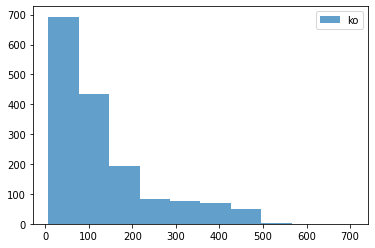

In [93]:
# 패딩을 위해 길이를 알아보자
import matplotlib.pyplot as plt

# encoderd의 길이를 알아봄
len_ko = []
for data in encoder_input:
    len_ko.append(len(data))

plt.hist(len_ko, label='ko', alpha=0.7)
plt.legend()
plt.show()

In [94]:
# 패딩을 수행
# 기본적으론 앞에 0를 붙이는데, post를 쓰면 뒤에 패딩이 됨
encoder_input = pad_sequences(encoder_input, maxlen=100, padding="post")

# 디코더는 길이가 다 2이지만, 혹시 촐라 패딩 진행
decoder_input = pad_sequences(decoder_input, padding="post")
decoder_output = pad_sequences(decoder_output, padding="post")

In [95]:
print(encoder_input.shape)

print(decoder_input.shape)

(1602, 100)
(1602, 3)


In [96]:
print(encoder_input[:3])
print(decoder_input[:3])
print(decoder_output[:3])

[[  112   430   936   724  3862   126  6927   228    34    21     1 12166
     27  2777    67    64    66  1061    61    38 12167  1026     2    24
     11 12168 12169   342   256    48    53 12170    30    43    55    33
     35    17   860   100 12171    13     7     5 12172   165    10     3
     68  1732    97   310  3863   861 12173   328 12174    39   526    54
    221 12175    16 12176 12177 12178    26    80  4900   549    92  4901
    598    56    76 12179 12180 12181   211 12182  6928  4902 12183    37
  12184   392    25 12185   173 12186  6929  3224 12187   143  6930  1160
  12188 12189    77 12190]
 [ 2778     9   229    18    10     6     1    33   230 12191    30    13
     11     2     3     7    15    54    70  3864  3865  2779  4903   352
    937  4904    35    36     8    22    19 12192 12193    28     4   216
      5 12194 12195 12196   183 12197    74    72    16 12198    24    17
  12199    40    76 12200    31   200 12201   120  2025    27    43  1111
  12202    

In [97]:
# 나중에 prediction 할때 사용하기 위함 (인덱스로 단어 찾기)
en_to_index = tokenizer_ko.word_index
index_to_en = tokenizer_ko.index_word

In [98]:
# 3:1로 나눴습니다
test_size = 1200
encoder_input_train = encoder_input[:-test_size]
decoder_input_train = decoder_input[:-test_size]
decoder_output_train = decoder_output[:-test_size]

encoder_input_test = encoder_input[-test_size:]
decoder_input_test = decoder_input[-test_size:]
decoder_output_test = decoder_output[-test_size:]

### training

In [99]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

In [100]:
# 인코더 모델

# input -> 1200 x 100 (훈련할때는)
# input -> 402 x 100 (테스트할때는)
encoder_inputs = Input(shape=(100,)) # 50 은 인풋 리스트의 길이

encoder_embed = Embedding(len(tokenizer_ko.word_index)+1, 100)(encoder_inputs)

encoder_mask = Masking(mask_value=0)(encoder_embed)

encoder_outputs, h_state, c_state = LSTM(100, return_state=True)(encoder_mask)

In [ ]:
# 디코더 모델
decoder_inputs = Input(shape=(3,))  # 2는 디코더 길이
decoder_embed = Embedding(len(tokenizer_ko.word_index)+1, 50)(decoder_inputs)
decoder_mask = Masking(mask_value=0)(decoder_embed)

decoder_lstm = LSTM(50, return_sequences=True, return_state=True)

decoder_outputs, _, _ = decoder_lstm(decoder_mask, initial_state=[h_state, c_state])

decoder_dense = Dense(len(tokenizer_ko.word_index)+1, activation='softmax')
decoder_softmax_outputs = decoder_dense(decoder_outputs)

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_output_train, validation_data = ([encoder_input_test, decoder_input_test], decoder_output_test), batch_size = 128, epochs = 50)

### Prediction

In [ ]:
# 인코더가 출력하는 마지막 시점의 셀/은닉 상태 값 따로 구하고
# <start> 라는 인풋을 따로 디코더 모델의 lstm에 집어넣어서
# lstm에서 내는 아웃풋 다시 lstm에 계속 집어넣는 형태로
# 그러다가 <end>가 보이면 그만
encoder_model = Model(encoder_inputs, [h_state, c_state])

In [ ]:
# 디코더 모델을 만들건데, 디코더 모델에 초기값으로 넣을 상태값의 모양을 지정
encoder_h_state = Input(shape=(50,))
encoder_c_state = Input(shape=(50,))

In [ ]:
# 우리가 시퀀스를 넣을게 아니라, 단어단어를 넣을거기 때문에
# 시점이 여러개가 아니라, 한 시점만 존재
# 상태값을 자동으로 넘겨주지 않기 때문에, 직접 넘겨줘야한다
# 셀 마다마다 상태의 초기값을 지정 / 나오는 상태값을 저장
pd_decoder_outputs, pd_h_state, pd_c_state = decoder_lstm(decoder_mask, initial_state=[encoder_h_state, encoder_c_state])
pd_decoder_softmax_outputs = decoder_dense(pd_decoder_outputs)

In [ ]:
# 모델은 디코더 인풋 (<start>), 인코더의 상태값이 인풋으로 들어간다
# lstm 셀 통과하면서 예측, softmax 함수를 통과한 출력값 (각 단어별 다음 단어일 확률값), 디코더의 상태값 두 개를 출력하는 것
# softmax 함수를 통과한 출력값 (확률) 을 토대로 다음 단어를 확정
# 다시 그 단어를 디코더 인풋으로 + 전 시점의 디코더의 상태값이 인풋으로 들어간다
decoder_model = Model([decoder_inputs] + [encoder_h_state, encoder_c_state], [pd_decoder_softmax_outputs] + [pd_h_state, pd_c_state])

In [ ]:
input_stc = input()
token_stc = input_stc.split()
encode_stc = tokenizer_ko.texts_to_sequences([token_stc])
pad_stc = pad_sequences(encode_stc, maxlen=50, padding="post")

# 인코더의 마지막 시점의 셀/은닉 상태 값
states_value = encoder_model.predict(pad_stc)

# <start> 를 정수 인코딩해서 numpy array 로
predicted_seq = np.zeros((1,1))
predicted_seq[0, 0] = en_to_index['<start>']

# 각 시점마다 예측된 단어를 저장
decoded_stc = []

while True:
    output_words, h, c = decoder_model.predict([predicted_seq] + states_value)

    predicted_word = index_to_en[np.argmax(output_words[0,0])]  

    if predicted_word == '<end>':
        break

    decoded_stc.append(predicted_word)

    # 처음에는 <start>, 지금은 예측된 단어가 있으니 이것을 인풋으로 넣어주기 위해서 변수의 값을 업데이트
    predicted_seq = np.zeros((1,1))
    predicted_seq[0, 0] = np.argmax(output_words[0,0])

    # 지금 시점의 상태 값을 다음 시점으로 넘기기 위해서 변수를 업데이트
    states_value = [h, c]

print(' '.join(decoded_stc))

## Contents Recommend

### TFIDF

In [102]:
# stock = uni_df
stock = pd.read_csv('ContentStock.csv', encoding='utf-8')

from sklearn.feature_extraction.text import TfidfVectorizer
# ngram_range=(1, 2) 는 단어를 1개 혹은 2개 연속으로 보겠다
tfidf_vec = TfidfVectorizer(ngram_range=(1, 2))
# ketwords 대신 ISSUE_CTNT사용
tfidf_matrix = tfidf_vec.fit_transform(stock['words'])
print(tfidf_vec.vocabulary_.items())
# 1602은 종목의 개수, 336은 단어의 개수 -> 하나의 주식를 336개 열을 가진 벡터로 표현
print(tfidf_matrix.shape)

# action adventure fantasy
# adventure fantasy
# adventure
# fantasy

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [103]:
# 유사도 행렬 (4803, 4803)
# 1, 1 (1번째 영화와 1번재 영화의 유사도)
# 1, 1 / 1, 2 / .... / 1, 4803 -> 1번째 영화와 1~4803번재 영화의 유사도
# 2, 1 / 2, 2 / .... / 2, 4803 -> 2번째 영화와 1~4803번째 영화의 유사도
# ....
# 4803, 1 / 4803, 2 / .... / 4803, 4803 -> 4803번째 영화와 1~4803번째 영화의 유사도
from sklearn.metrics.pairwise import cosine_similarity

# 10개의 종목이랑 10개의 종목끼리 유사도를 구하겠다!
# 자신과의 유사도는 1
genres_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(genres_similarity)
# 유사도 값이 높은 영화의 제목
# 유사도 값이 높은 순으로 인덱스 값을 뽑아낸다
similar_index = np.argsort(-genres_similarity)
print(similar_index)

[[1.         0.01034327 0.00755159 ... 0.01191281 0.00793788 0.0073007 ]
 [0.01034327 1.         0.01586127 ... 0.0104116  0.00322752 0.00647109]
 [0.00755159 0.01586127 1.         ... 0.00359524 0.00677004 0.00617284]
 ...
 [0.01191281 0.0104116  0.00359524 ... 1.         0.00201456 0.00532502]
 [0.00793788 0.00322752 0.00677004 ... 0.00201456 1.         0.00711835]
 [0.0073007  0.00647109 0.00617284 ... 0.00532502 0.00711835 1.        ]]
[[   0 1183 1504 ...  357 1275  800]
 [   1 1039  568 ... 1493   16  800]
 [   2  784  184 ...  922 1493 1016]
 ...
 [1599  188  151 ...  399 1493  800]
 [1600 1532  856 ...  399  911 1249]
 [1601 1139  827 ...  399 1016  800]]


### Count(빈도수)

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1, 2))
count_matrix = count_vec.fit_transform(stock['words'])
print(count_matrix)

  (0, 212892)	1
  (0, 119698)	1
  (0, 236463)	1
  (0, 852)	1
  (0, 87559)	1
  (0, 37963)	1
  (0, 51726)	1
  (0, 149976)	1
  (0, 452)	1
  (0, 125108)	1
  (0, 201568)	1
  (0, 172198)	1
  (0, 102186)	1
  (0, 29051)	1
  (0, 21659)	1
  (0, 136250)	1
  (0, 9410)	1
  (0, 136243)	1
  (0, 177466)	1
  (0, 183898)	1
  (0, 202401)	1
  (0, 71083)	1
  (0, 88744)	1
  (0, 35613)	1
  (0, 89047)	1
  :	:
  (1601, 20403)	1
  (1601, 51315)	1
  (1601, 223435)	1
  (1601, 237447)	1
  (1601, 100877)	1
  (1601, 8484)	1
  (1601, 69101)	1
  (1601, 17772)	1
  (1601, 20251)	1
  (1601, 61498)	1
  (1601, 171782)	1
  (1601, 225507)	1
  (1601, 33286)	1
  (1601, 61906)	1
  (1601, 144451)	1
  (1601, 22605)	1
  (1601, 144340)	1
  (1601, 207103)	1
  (1601, 32984)	1
  (1601, 30800)	1
  (1601, 152962)	1
  (1601, 55236)	1
  (1601, 43282)	1
  (1601, 28143)	1
  (1601, 114389)	1


In [105]:
# 유사도 행렬 (10, 10)
# 1, 1 (1번째 종목과 1번째 종목의 유사도)
# 1, 1 / 1, 2 / .... / 1, 10
# 2, 1 / 2, 2 / .... / 2, 10
# .....
# 10, 1 / 10, 2 / .... / 10, 10
from sklearn.metrics.pairwise import cosine_similarity

# 10개의 종목이랑 10개의 종목끼리 유사도를 구하겠다!
genres_similarity = cosine_similarity(count_matrix, count_matrix)
print(genres_similarity)
# 유사도가 높은 종목을 알고 싶다!
# 유사도 값이 높은 것의 인덱스를 내림차순으로 출력/리턴
similar_index = np.argsort(-genres_similarity)
print(similar_index)

[[1.         0.11064221 0.10174462 ... 0.08712888 0.06580657 0.07960473]
 [0.11064221 1.         0.1412273  ... 0.09895077 0.05480595 0.0874759 ]
 [0.10174462 0.1412273  1.         ... 0.06672848 0.06775809 0.09935206]
 ...
 [0.08712888 0.09895077 0.06672848 ... 1.         0.02877251 0.06526024]
 [0.06580657 0.05480595 0.06775809 ... 0.02877251 1.         0.0642591 ]
 [0.07960473 0.0874759  0.09935206 ... 0.06526024 0.0642591  1.        ]]
[[   0 1183 1024 ...   16 1275  800]
 [   1  151  554 ...  911 1493  800]
 [   2 1206  151 ... 1016   16 1493]
 ...
 [1599  962   39 ...  399  909  800]
 [1600  356 1065 ... 1249  399  911]
 [1601  436  883 ...   16  752  800]]


### 입력에 따른 추천

In [ ]:
# 사용자가 입력한 조의 인덱스 값을 찾아내고
# similar_index 에 기록된 유사한 영화 인덱스를 찾아내고
# 유사한 영화 인덱스를 토대로 영화 이름을 찾아내면 된다!
input_stock = input()

stock_index = stock[stock['name'] ==input_stock].index.values
print(stock_index)
similar_stock = similar_index[stock_index, :10]
print(similar_stock)
# 인덱스로 사용하기 위해서는 1차원으로 변형해줘야하기 때문
similar_stock_index = similar_stock.reshape(-1)
print(similar_stock_index)
print(stock.iloc[similar_stock_index])